In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [8]:
data=pd.read_csv("titanic_dataset.csv")

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.describe() # checking the summary.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Inferences from above output:

1. Age column has missing value and needs to be treated
2. Fare can have outliers.

In [11]:
# cross checking for missing values for all the variables
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Along with Age we have missing values for cabin and Embarked. We can drop the Cabin variable as maximum cell values are missing.

In [12]:
#Missing value tratement: Age and Embarked

#Considering median value for treating the missing value for age variable
data["Age"]=data["Age"].fillna(data["Age"].median())

In [13]:
#Treating the missing value for embarked with "S"
data["Embarked"]=data["Embarked"].fillna(data["Embarked"]=="S")

In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
# hence for both the variables missing value treatement has been done. The Cabin variable will be dropped.

In [16]:
data=data.drop("Cabin",axis=1)

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
# Transforming Categorical variables to numeric: "Embarked" and "Sex" 
# Replacing Embarked data: S=0,C=1 and Q=2

data["Embarked"][data["Embarked"]=="S"]=0
data["Embarked"][data["Embarked"]=="C"]=1
data["Embarked"][data["Embarked"]=="Q"]=2

C:\Users\PRATIK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\PRATIK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\PRATIK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
# Replacing Sex data: Male=0 and Female=1
data["Sex"][data["Sex"]=="male"]=0
data["Sex"][data["Sex"]=="female"]=1

C:\Users\PRATIK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\PRATIK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# dropping Name, Ticket and Passengerid columns from the dataset
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [21]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(data.drop("Survived",axis=1),data["Survived"],test_size=0.2,random_state=120)

In [24]:
X_Train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
792,3,1,28.0,8,2,69.5500,0
680,3,1,28.0,0,0,8.1375,2
97,1,0,23.0,0,1,63.3583,1
353,3,0,25.0,1,0,17.8000,0
864,2,0,24.0,0,0,13.0000,0


In [25]:
import statsmodels.api as sm

In [26]:
# adding the constant term for the intercept in the model
X_Train=sm.add_constant(X_Train)
X_Test=sm.add_constant(X_Test)

In [27]:
logit=sm.GLM(Y_Train.astype(float),X_Train.astype(float),family=sm.families.Binomial())#incurred error hence used .astype(float)

In [28]:
result=logit.fit()

In [29]:
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            637.2733  
Link Function:      logit            BIC:            -4002.6536
Dependent Variable: Survived         Log-Likelihood: -310.64   
Date:               2019-01-18 02:10 LL-Null:        -478.44   
No. Observations:   712              Deviance:       621.27    
Df Model:           7                Pearson chi2:   733.      
Df Residuals:       704              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        2.0240    0.5429   3.7284  0.0002   0.9600   3.0880
Pclass      -1.1114    0.1600  -6.9466  0.0000  -1.4250  -0.7978
Sex          2.7970    0.2229  12.5493  0.0000   2.3601   3.2338
Age         -0.0354    0.0088  -4.0087  0.0001  -

Observations:
For the following variables Parch, Fare and Embarked the P-value is higher than the confidende level of 0.05 hence will delete.
AIC: The lower the AIC the better is the model.
Devience: This should be lower as it indicated that how much unexplaned varience is there in the model


Using Backward Elimination to remove the insignificant variables

In [30]:
X_Train.drop("Parch",axis=1,inplace=True)

In [31]:
logit1=sm.GLM(Y_Train.astype(float),X_Train.astype(float),family=sm.families.Binomial())

In [32]:
result1=logit1.fit()

In [33]:
print(result1.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            635.4916  
Link Function:      logit            BIC:            -4009.0033
Dependent Variable: Survived         Log-Likelihood: -310.75   
Date:               2019-01-18 02:11 LL-Null:        -478.44   
No. Observations:   712              Deviance:       621.49    
Df Model:           6                Pearson chi2:   736.      
Df Residuals:       705              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        2.0446    0.5405   3.7826  0.0002   0.9852   3.1040
Pclass      -1.1230    0.1580  -7.1070  0.0000  -1.4327  -0.8133
Sex          2.7759    0.2177  12.7491  0.0000   2.3491   3.2026
Age         -0.0354    0.0088  -4.0177  0.0001  -

In [34]:
X_Train.drop("Fare",axis=1,inplace=True)

In [35]:
logit2=sm.GLM(Y_Train.astype(float),X_Train.astype(float),family=sm.families.Binomial())

In [36]:
result2=logit2.fit()

In [37]:
print(result2.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            634.0116  
Link Function:      logit            BIC:            -4015.0515
Dependent Variable: Survived         Log-Likelihood: -311.01   
Date:               2019-01-18 02:11 LL-Null:        -478.44   
No. Observations:   712              Deviance:       622.01    
Df Model:           5                Pearson chi2:   736.      
Df Residuals:       706              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        2.2088    0.4893   4.5146  0.0000   1.2499   3.1677
Pclass      -1.1781    0.1382  -8.5254  0.0000  -1.4489  -0.9072
Sex          2.7840    0.2173  12.8099  0.0000   2.3580   3.2100
Age         -0.0356    0.0088  -4.0392  0.0001  -

In [38]:
# Removing Embarked
X_Train.drop("Embarked",axis=1,inplace=True)

In [39]:
logit3=sm.GLM(Y_Train.astype(float),X_Train.astype(float),family=sm.families.Binomial())

In [40]:
result3=logit3.fit()
print(result3.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            633.8738  
Link Function:      logit            BIC:            -4019.7573
Dependent Variable: Survived         Log-Likelihood: -311.94   
Date:               2019-01-18 02:11 LL-Null:        -478.44   
No. Observations:   712              Deviance:       623.87    
Df Model:           4                Pearson chi2:   736.      
Df Residuals:       707              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        2.2508    0.4884   4.6088  0.0000   1.2936   3.2079
Pclass      -1.1632    0.1373  -8.4713  0.0000  -1.4324  -0.8941
Sex          2.8231    0.2166  13.0348  0.0000   2.3986   3.2476
Age         -0.0356    0.0088  -4.0342  0.0001  -

Now since the p-values of the remaining variables are significant we we consider model 3 as our final model and will construct the model on Test with this

In [41]:
X_Test.head()

,const,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
459,1.0,3,0,28.0,0,0,7.7500,2
389,1.0,2,1,17.0,0,0,12.0000,1
773,1.0,3,0,28.0,0,0,7.2250,1
778,1.0,3,0,28.0,0,0,7.7375,2
137,1.0,1,0,37.0,1,0,53.1000,0


In [97]:
# Predicting on the Test data

In [42]:
X_Test.drop(["Embarked","Fare","Parch"],axis=1,inplace=True) # removing the insignifant variables from test dataset

In [43]:
X_Test.head()

,const,Pclass,Sex,Age,SibSp
459,1.0,3,0,28.0,0
389,1.0,2,1,17.0,0
773,1.0,3,0,28.0,0
778,1.0,3,0,28.0,0
137,1.0,1,0,37.0,1


In [67]:
Y_prob=result3.predict(X_Test.astype(float))# running the model3 on X_Test

In [71]:
Y_prob.head()

459    0.096639
389    0.894974
773    0.096639
778    0.096639
137    0.361430
dtype: float64

In [ ]:
# inference: from the above, probability that the row value 459 is accurate is 10% where as 389 is 89%

In [83]:
predicted_classes=Y_prob.map(lambda x: 1 if x > 0.5 else 0) #at 50% probability

In [145]:
predicted_classes.head()

459    0
389    1
773    0
778    0
137    0
dtype: int64

#Accuracy Score

In [91]:
score=sum(predicted_classes==Y_Test)/len(Y_Test)

In [92]:
print(score)

0.7653631284916201


In [140]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy_score(Y_Test,predicted_classes, normalize=True)

0.7653631284916201

In [155]:
# number of correctly classified observations
accuracy_score(Y_Test,predicted_classes, normalize=False)

137

In [146]:
#Number of incorrectly classifiedly observations
len(Y_Test)-accuracy_score(Y_Test,predicted_classes, normalize=False)

42

#Calculating Log Loss

In [147]:
from sklearn.metrics import log_loss

In [150]:
log_loss(Y_Test,Y_prob)

0.46890626030971777

Confusion matrix


In [90]:
from sklearn.metrics import confusion_matrix

In [121]:
conf_metrics=confusion_matrix(Y_Test,predicted_classes)


In [97]:
confusion_df=pd.DataFrame(conf_metrics,index=['Actual neg','Actual pos'],columns=['Predicted neg','Predicted pos'])

In [98]:
confusion_df

,Predicted neg,Predicted pos
Actual neg,103,17
Actual pos,25,34


Text(0.5,1,'Accuracy score:0.7653631284916201')

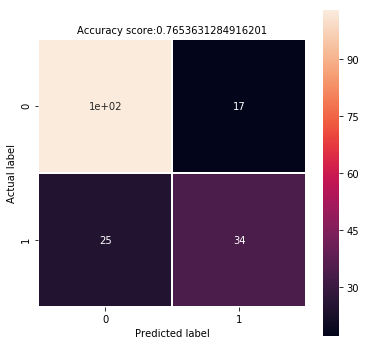

In [123]:
plt.figure(figsize=(6,6))
_=sns.heatmap(conf_metrics,annot=True,square=True,linewidths=0.5)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
sample_title='Accuracy score:{0}'.format(score)
plt.title(sample_title,size=10)

In [107]:
# calculating presion and recall and f1 score

In [111]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [110]:
print(classification_report(Y_Test, predicted_classes))

             precision    recall  f1-score   support

          0       0.80      0.86      0.83       120
          1       0.67      0.58      0.62        59

avg / total       0.76      0.77      0.76       179



Precision measures out of the total positives predicted by the model how many of them were actual positives. 
Whereas Recall is a measure describing out of the total true positives how many of them is the model able to indentify correctly.

In [113]:
precisions, recalls, thresholds=metrics.precision_recall_curve(Y_Test,Y_prob)

In [119]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1],"b--", label='Precision')
    plt.plot(thresholds, recalls[:-1],"g-",label='Recall')
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])

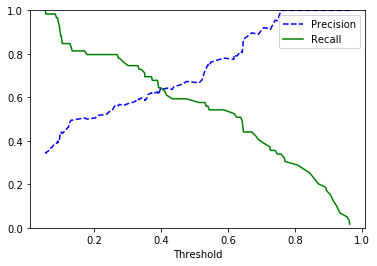

In [120]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

AUC_ROC Curve

In [127]:
auc=metrics.roc_auc_score(Y_Test,Y_prob)
print(auc)

0.8171610169491524


In [128]:
fpr,tpr,thresholds=metrics.roc_curve(Y_Test,Y_prob)

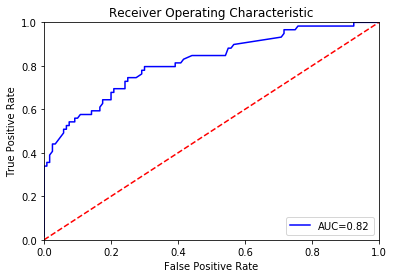

In [129]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [130]:
# calculating the optimal threshold from the ROC curve.
optimal_idx=np.argmax(tpr-fpr)
optimal_threshold=thresholds[optimal_idx]

In [131]:
print(optimal_threshold)

0.26970877446001457


In [132]:
# updating model based on the optimal probability threshold 

In [133]:
new_predctions=np.where(Y_prob>optimal_threshold,1,0)

In [134]:
new_confusion_matrix=confusion_matrix(Y_Test,new_predctions)

In [135]:
new_confusion_df=pd.DataFrame(new_confusion_matrix,index=['Actual neg','Actual pos'],columns=['Predicted neg','Predicted pos'])

In [136]:
new_confusion_df

,Predicted neg,Predicted pos
Actual neg,84,36
Actual pos,13,46


In [137]:
print(classification_report(Y_Test, new_predctions))

             precision    recall  f1-score   support

          0       0.87      0.70      0.77       120
          1       0.56      0.78      0.65        59

avg / total       0.77      0.73      0.73       179



In [ ]:
# all the above decreased compared to the old prediction

In [152]:
accuracy_score(Y_Test,new_predctions)

0.7262569832402235

In [156]:
#calculate log loss with new prediction
log_loss(Y_Test,new_predctions)

9.4549096584252

Inference:
    It seems the optimal threshold from the ROC curve has decreased the new score. Hence will consider using the precision recall matrix to get a better prediction.
    Also some Feature Engineering with age where we get a child variable(age<18) might increase the accuracy